This is the notebook for the Coursera Data Science Capstone Project.  In this analysis, I will load and analyze data which will allow me to best select an outdoor location in Santa Monica to set up a meditation meetup group.

The first step is to import lots of libraries, which I will use for the analysis.

In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import matplotlib as plt

#import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


The next step is to connect to the Foursquare API.

In [37]:
CLIENT_ID = 'xxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxx' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxxx
CLIENT_SECRET:xxxx


I then define a function with which I will identify nearby venues from the FourSquare API

In [3]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

I then load city data--in this case I am typing it in, after finding it via Google Maps.  I also use the head() command to ensure it loaded correctly.

In [4]:
latitude = 34.0230
longitude = -118.4818

data = [['Downtown', 34.016605, -118.496779], 
        ['Main Street', 34.002576, -118.483936],
        ['Mid-City', 34.030675, -118.479704],
        ['Wilshire',34.027000, -118.495048],
        ['Ocean Park',34.003751, -118.482089],
        ['Pico',34.021745, -118.471855],
        ['Santa Monica Pier',34.010387, -118.496125],
        ['Montana',34.037277, -118.500073],
        ['Sunset Park', 34.016416, -118.460135]]
neighborhoods = pd.DataFrame(data,columns = ['Neighborhood','Latitude','Longitude'])
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Downtown,34.016605,-118.496779
1,Main Street,34.002576,-118.483936
2,Mid-City,34.030675,-118.479704
3,Wilshire,34.027000,-118.495048
4,Ocean Park,34.003751,-118.482089


Let's take a look at the venues and be sure the loaded correctly.  let's take a look!

In [5]:
santamonica_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Downtown
Main Street
Mid-City
Wilshire
Ocean Park
Pico
Santa Monica Pier
Montana
Sunset Park


In [6]:
santamonica_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown,34.016605,-118.496779,Third Street Promenade,34.016113,-118.496059,Shopping Plaza
1,Downtown,34.016605,-118.496779,sweetgreen,34.016976,-118.495518,Salad Place
2,Downtown,34.016605,-118.496779,SUGARFISH by sushi nozawa,34.015238,-118.497377,Sushi Restaurant
3,Downtown,34.016605,-118.496779,Tender Greens,34.016426,-118.498583,Salad Place
4,Downtown,34.016605,-118.496779,Patagonia,34.016717,-118.495870,Clothing Store
5,Downtown,34.016605,-118.496779,REI,34.016428,-118.494671,Sporting Goods Shop
6,Downtown,34.016605,-118.496779,Laemmle Monica Film Center,34.015350,-118.497885,Indie Movie Theater
7,Downtown,34.016605,-118.496779,Burke Williams Spa,34.016645,-118.495470,Spa
8,Downtown,34.016605,-118.496779,Santa Monica Farmers Market,34.017024,-118.497677,Farmers Market
9,Downtown,34.016605,-118.496779,The Misfit Restaurant + Bar,34.015399,-118.496591,American Restaurant


Now it's time to perform one-hot encoding to separate out venue types for each neighborhood.

In [7]:
# one hot encoding
santamonica_onehot = pd.get_dummies(santamonica_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santamonica_onehot['Neighborhood'] = santamonica_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santamonica_onehot.columns[-1]] + list(santamonica_onehot.columns[:-1])
santamonica_onehot = santamonica_onehot[fixed_columns]

santamonica_onehot.head()

,Neighborhood,ATM,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Mountain,Movie Theater,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Downtown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
santamonica_grouped = santamonica_onehot.groupby('Neighborhood').mean().reset_index()
santamonica_grouped

,Neighborhood,ATM,Airport,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bike Shop,Board Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Dive Bar,Dog Run,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Mountain,Movie Theater,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,State / Provincial Park,Steakhouse,Street Food Gathering,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Downtown,0.00,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.010000,0.01,0.000000,0.00,0.000000,0.000000,0.020000,0.010000,0.00,0.00,0.00,0.00,0.01,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.030000,0.00,0.020000,0.01,0.00,0.00,0.000000,0.000000,0.06,0.00,0.040000,0.01,0.00,0.000000,0.020000,0.020000,0.000000,0.01,0.00,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.02,0.00,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.030000,0.000000,0.00,0.00,0.04,0.01,0.000000,0.000000,0.010000,0.00,0.020000,0.000000,0.010000,0.010000,0.00,0.000000,0.000000,0.01,0.000000,0.010000,0.000000,0.00,0.00,0.030000,0.030000,0.00,0.01,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.020000,0.01,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.01,0.020000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.00,0.00,0.01,0.020000,0.00,0.020000,0.000000,0.010000,0.00,0.02,0.00,0.01,0.01,0.01,0.000000,0.00,0.00,0.000000,0.010000,0.00,0.03,0.01,0.020000,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.01,0.040000
1,Main Street,0.00,0.000000,0.000000,0.040000,0.000000,0.00,0.000000,0.020000,0.010000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.090000,0.00,0.01,0.00,0.01,0.00,0.01,0.000000,0.00,0.00,0.010000,0.000000,0.000000,0.00,0.070000,0.00,0.01,0.00,0.000000,0.000000,0.00,0.00,0.040000,0.00,0.00,0.000000,0.020000,0.000000,0.000000,0.01,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0

Now let's take the grouped venues and determine the five most common venue types for each neighborhood.

In [9]:
num_top_venues = 5

for hood in santamonica_grouped['Neighborhood']:
    #print("----"+hood+"----")
    temp = santamonica_grouped[santamonica_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

                 venue  freq
0       Clothing Store  0.06
1  American Restaurant  0.05
2          Yoga Studio  0.04
3          Coffee Shop  0.04
4                Hotel  0.04


                 venue  freq
0                Beach  0.09
1                 Café  0.07
2   Seafood Restaurant  0.05
3          Coffee Shop  0.04
4  American Restaurant  0.04


                           venue  freq
0                    Coffee Shop  0.10
1            American Restaurant  0.04
2                     Food Truck  0.04
3                          Hotel  0.03
4  Vegetarian / Vegan Restaurant  0.02


                venue  freq
0            Boutique  0.07
1         Coffee Shop  0.07
2      Cosmetics Shop  0.07
3                 Spa  0.05
4  Italian Restaurant  0.05


                venue  freq
0               Beach  0.08
1                Café  0.05
2                Park  0.04
3  Seafood Restaurant  0.04
4         Coffee Shop  0.04


              venue  freq
0       Coffee Shop  0.10
1       Pizza Place 

Great, this works-let's make it into a function and find the top 10 venues for each neighborhood, for our analysis

In [10]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [11]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = santamonica_grouped['Neighborhood']

for ind in np.arange(santamonica_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(santamonica_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Clothing Store,American Restaurant,Coffee Shop,Hotel,Yoga Studio,Burger Joint,Mediterranean Restaurant,Gym,Mexican Restaurant,Sporting Goods Shop
1,Main Street,Beach,Café,Seafood Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Italian Restaurant,Hotel,Park,Arts & Crafts Store
2,Mid-City,Coffee Shop,American Restaurant,Food Truck,Hotel,Breakfast Spot,Pet Store,Pizza Place,Poke Place,Supermarket,Irish Pub
3,Montana,Coffee Shop,Cosmetics Shop,Boutique,Italian Restaurant,Spa,Gastropub,American Restaurant,Ice Cream Shop,Beach,Juice Bar
4,Ocean Park,Beach,Café,Coffee Shop,Seafood Restaurant,Park,Mexican Restaurant,Italian Restaurant,American Restaurant,Hotel,Sushi Restaurant


Now we can run k-means clustering on this information.  I'll break the data into three clusters, as there aren't too many neighborhoods in Santa Monica.

In [12]:
# set number of clusters
kclusters = 3

santamonica_grouped_clustering = santamonica_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(santamonica_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 1, 0, 1, 2, 1, 1], dtype=int32)

In [13]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head(105)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Downtown,Clothing Store,American Restaurant,Coffee Shop,Hotel,Yoga Studio,Burger Joint,Mediterranean Restaurant,Gym,Mexican Restaurant,Sporting Goods Shop
1,0,Main Street,Beach,Café,Seafood Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Italian Restaurant,Hotel,Park,Arts & Crafts Store
2,1,Mid-City,Coffee Shop,American Restaurant,Food Truck,Hotel,Breakfast Spot,Pet Store,Pizza Place,Poke Place,Supermarket,Irish Pub
3,1,Montana,Coffee Shop,Cosmetics Shop,Boutique,Italian Restaurant,Spa,Gastropub,American Restaurant,Ice Cream Shop,Beach,Juice Bar
4,0,Ocean Park,Beach,Café,Coffee Shop,Seafood Restaurant,Park,Mexican Restaurant,Italian Restaurant,American Restaurant,Hotel,Sushi Restaurant
5,1,Pico,Coffee Shop,Pizza Place,Café,American Restaurant,Art Gallery,Asian Restaurant,Food Truck,Gym,Park,Poke Place
6,2,Santa Monica Pier,American Restaurant,Seafood Restaurant,Clothing Store,Hotel,Burger Joint,Steakhouse,Theme Park Ride / Attraction,Italian Restaurant,Beach,Sushi Restaurant
7,1,Sunset Park,Coffee Shop,Park,Food Truck,Pizza Place,Café,Grocery Store,Mexican Restaurant,Italian Restaurant,Frozen Yogurt Shop,Art Gallery
8,1,Wilshire,Coffee Shop,Spa,American Restaurant,Cosmetics Shop,Italian Restaurant,New American Restaurant,Mexican Restaurant,Salad Place,Café,Deli / Bodega


Time to get ready to plot this--adding lat and long data.

In [14]:
#merge data for mapping plot
santamonica_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
santamonica_merged = santamonica_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

#error coding
santamonica_merged.fillna(santamonica_merged['Cluster Labels'].max()+1,inplace=True)
#toronto_merged.loc[5,:]
santamonica_merged.head(10) # check the last columns!
#toronto_merged['ClusterLabels']=
santamonica_merged['Cluster Labels']=santamonica_merged['Cluster Labels'].astype(int)
santamonica_merged.head(10)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,34.016605,-118.496779,2,Clothing Store,American Restaurant,Coffee Shop,Hotel,Yoga Studio,Burger Joint,Mediterranean Restaurant,Gym,Mexican Restaurant,Sporting Goods Shop
1,Main Street,34.002576,-118.483936,0,Beach,Café,Seafood Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Italian Restaurant,Hotel,Park,Arts & Crafts Store
2,Mid-City,34.030675,-118.479704,1,Coffee Shop,American Restaurant,Food Truck,Hotel,Breakfast Spot,Pet Store,Pizza Place,Poke Place,Supermarket,Irish Pub
3,Wilshire,34.027000,-118.495048,1,Coffee Shop,Spa,American Restaurant,Cosmetics Shop,Italian Restaurant,New American Restaurant,Mexican Restaurant,Salad Place,Café,Deli / Bodega
4,Ocean Park,34.003751,-118.482089,0,Beach,Café,Coffee Shop,Seafood Restaurant,Park,Mexican Restaurant,Italian Restaurant,American Restaurant,Hotel,Sushi Restaurant
5,Pico,34.021745,-118.471855,1,Coffee Shop,Pizza Place,Café,American Restaurant,Art Gallery,Asian Restaurant,Food Truck,Gym,Park,Poke Place
6,Santa Monica Pier,34.010387,-118.496125,2,American Restaurant,Seafood Restaurant,Clothing Store,Hotel,Burger Joint,Steakhouse,Theme Park Ride / Attraction,Italian Restaurant,Beach,Sushi Restaurant
7,Montana,34.037277,-118.500073,1,Coffee Shop,Cosmetics Shop,Boutique,Italian Restaurant,Spa,Gastropub,American Restaurant,Ice Cream Shop,Beach,Juice Bar
8,Sunset Park,34.016416,-118.460135,1,Coffee Shop,Park,Food Truck,Pizza Place,Café,Grocery Store,Mexican Restaurant,Italian Restaurant,Frozen Yogurt Shop,Art Gallery


Let's also characterize the clusters by looking at the most common elements in each one.

In [15]:
santamonica_merged.loc[santamonica_merged['Cluster Labels'] == 0, santamonica_merged.columns[[0] + list(range(4, santamonica_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Main Street,Beach,Café,Seafood Restaurant,Coffee Shop,American Restaurant,Sushi Restaurant,Italian Restaurant,Hotel,Park,Arts & Crafts Store
4,Ocean Park,Beach,Café,Coffee Shop,Seafood Restaurant,Park,Mexican Restaurant,Italian Restaurant,American Restaurant,Hotel,Sushi Restaurant


In [16]:
santamonica_merged.loc[santamonica_merged['Cluster Labels'] == 1, santamonica_merged.columns[[0] + list(range(4, santamonica_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Mid-City,Coffee Shop,American Restaurant,Food Truck,Hotel,Breakfast Spot,Pet Store,Pizza Place,Poke Place,Supermarket,Irish Pub
3,Wilshire,Coffee Shop,Spa,American Restaurant,Cosmetics Shop,Italian Restaurant,New American Restaurant,Mexican Restaurant,Salad Place,Café,Deli / Bodega
5,Pico,Coffee Shop,Pizza Place,Café,American Restaurant,Art Gallery,Asian Restaurant,Food Truck,Gym,Park,Poke Place
7,Montana,Coffee Shop,Cosmetics Shop,Boutique,Italian Restaurant,Spa,Gastropub,American Restaurant,Ice Cream Shop,Beach,Juice Bar
8,Sunset Park,Coffee Shop,Park,Food Truck,Pizza Place,Café,Grocery Store,Mexican Restaurant,Italian Restaurant,Frozen Yogurt Shop,Art Gallery


In [17]:
santamonica_merged.loc[santamonica_merged['Cluster Labels'] == 2, santamonica_merged.columns[[0] + list(range(4, santamonica_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Clothing Store,American Restaurant,Coffee Shop,Hotel,Yoga Studio,Burger Joint,Mediterranean Restaurant,Gym,Mexican Restaurant,Sporting Goods Shop
6,Santa Monica Pier,American Restaurant,Seafood Restaurant,Clothing Store,Hotel,Burger Joint,Steakhouse,Theme Park Ride / Attraction,Italian Restaurant,Beach,Sushi Restaurant


Time to load the trees data

In [18]:
trees = pd.read_csv('Trees_Inventory.csv')
trees.head()

,Tree ID,Date Modified,Species ID,Name Botanical,Name Common,Height Group,Height Min,Height Max,DBH Group,DBH Min,DBH Max,District,Location,Latitude,Longitude,Address,Street,On Address,On Street,Tree Number,Location Description
0,10948954,03/14/2016 11:00:00 AM,59,Jacaranda mimosifolia,Jacaranda,2,15.0,30.0,2,7.0,12.0,18,"(34.01053790575, -118.4859731435)",34.010538,-118.485973,400,PICO BL MEDIAN FR 4TH ST TO 6TH ST,400,PICO BL MEDIAN FR 4TH ST TO 6TH ST,4,Median
1,12908592,10/16/2020 01:56:00 PM,24,Cinnamomum camphora,Camphor Tree,1,1.0,15.0,1,0.0,6.0,9,"(34.0220445911455, -118.50116841495)",34.022045,-118.501168,1011,4TH ST,400,WASHINGTON AV,6,Side
2,11422448,11/09/2016 03:39:00 PM,677,Parkinsonia X 'Desert Museum',Desert Museum Palo Verde,1,1.0,15.0,1,0.0,6.0,17,"(34.017594434488, -118.482927717268)",34.017594,-118.482928,1100,OLYMPIC BL,1100,OLYMPIC BL,4,Front
3,10918442,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,4,45.0,60.0,4,19.0,24.0,7,"(34.027601707785, -118.48766848643)",34.027602,-118.487668,1214,16TH ST,1500,WILSHIRE BL,1,Side
4,10921437,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,4,45.0,60.0,4,19.0,24.0,9,"(34.02055528775, -118.49673876721)",34.020555,-118.496739,525,WILSHIRE BL,525,WILSHIRE BL,4,Front


I prefer the tall Mexican Palm Trees-let's find them in the database.

In [19]:
talltrees = trees.loc[trees['Height Group']==5]
talltrees = talltrees.loc[talltrees['Name Common'] == 'Mexican Fan Palm']
talltrees.head()

,Tree ID,Date Modified,Species ID,Name Botanical,Name Common,Height Group,Height Min,Height Max,DBH Group,DBH Min,DBH Max,District,Location,Latitude,Longitude,Address,Street,On Address,On Street,Tree Number,Location Description
158,10918577,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,5,60.0,NaN,4,19.0,24.0,8,"(34.02375916448, -118.49440796357)",34.023759,-118.494408,1127,9TH ST,1127,9TH ST,1,Front
172,10918582,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,5,60.0,NaN,4,19.0,24.0,8,"(34.02396281877, -118.49464812691)",34.023963,-118.494648,1117,9TH ST,1117,9TH ST,2,Front
190,10918605,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,5,60.0,NaN,4,19.0,24.0,8,"(34.027421586184, -118.49894003873)",34.027422,-118.498940,844,9TH ST,844,9TH ST,1,Front
230,10918619,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,5,60.0,NaN,4,19.0,24.0,8,"(34.027514379945, -118.49879448381)",34.027514,-118.498794,839,9TH ST,839,9TH ST,2,Front
231,10918626,03/14/2016 10:41:00 AM,75,Washingtonia robusta,Mexican Fan Palm,5,60.0,NaN,4,19.0,24.0,8,"(34.027819458871, -118.49915594089)",34.027819,-118.499156,827,9TH ST,827,9TH ST,1,Front


Map the tall Mexican palm trees in forest green, along with the neighborhood clusters in Santa Monica

In [20]:
# create map
colors_array = cm.rainbow(np.linspace(0, 1, 3))
rainbow = [colors.rgb2hex(i) for i in colors_array]

map_talltrees = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to the map
markers_colors = []
for lat, lon, nm, ht in zip(talltrees['Latitude'], talltrees['Longitude'], talltrees['Name Common'], talltrees['Height Group']):
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        color='green',#rainbow[cluster-1],
        fill=True,
        fill_color='green',#rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_talltrees)
       
        
for lat, lon, poi, cluster in zip(santamonica_merged['Latitude'], santamonica_merged['Longitude'], santamonica_merged['Neighborhood'], santamonica_merged['Cluster Labels']):
    #print(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_talltrees)
    
    
map_talltrees

Let's run some statistics on the palm trees in Santa Monica.

In [21]:
treecounts = trees.groupby('Name Common').size().to_frame().reset_index()
treecounts.rename(columns={0:'Count'},inplace=True)
treecounts.sort_values(['Count'],ascending=False,inplace=True)
treecounts.reset_index(inplace=True)
del treecounts['index']
treecounts

,Name Common,Count
0,Mexican Fan Palm,4381
1,Indian Laurel Fig,2939
2,Southern Magnolia,1934
3,Yew Pine,1342
4,Vacant Site,1275
5,Camphor Tree,1262
6,Canary Island Pine,1118
7,Canary Island Date Palm,1118
8,Jacaranda,1048
9,Deodar Cedar,862


Above we see the tree types in Santa Monica, sorted from most to least frequent type.  We see that Mexian Fan Palm trees are the most common trees.  Let's look at palm trees in Santa Monica, specifically now.

In [22]:
treecounts['IsPalm']=treecounts['Name Common'].str.contains('Palm')
palmtreecounts =treecounts.loc[treecounts['IsPalm']==True]
palmtreecounts.sort_values(['Count'],ascending=False,inplace=True)
palmtreecounts.reset_index(inplace=True)
palmtreecounts.drop(['index'],axis=1,inplace=True)
palmtreecounts

<ipython-input-22-8ca0b46f558d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  palmtreecounts.sort_values(['Count'],ascending=False,inplace=True)
/home/stephanie/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name Common,Count,IsPalm
0,Mexican Fan Palm,4381,True
1,Canary Island Date Palm,1118,True
2,Queen Palm,505,True
3,Date Palm,269,True
4,Guadalupe Palm,168,True
5,Windmill Palm,148,True
6,Chilean Wine Palm,129,True
7,King Palm,108,True
8,California Fan Palm,62,True
9,San Jose Hesper Palm,54,True


In [23]:
totalpalms = palmtreecounts['Count'].sum()
totalpalms

7242

In [24]:
totaltrees = treecounts['Count'].sum()
totaltrees

36519

In [25]:
palmtreecounts.loc[:,'Percent']=palmtreecounts.loc[:,'Count']/(totalpalms)*100

/home/stephanie/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/stephanie/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
palmtreecounts

,Name Common,Count,IsPalm,Percent
0,Mexican Fan Palm,4381,True,60.494339
1,Canary Island Date Palm,1118,True,15.437724
2,Queen Palm,505,True,6.973212
3,Date Palm,269,True,3.714444
4,Guadalupe Palm,168,True,2.319801
5,Windmill Palm,148,True,2.043634
6,Chilean Wine Palm,129,True,1.781276
7,King Palm,108,True,1.491301
8,California Fan Palm,62,True,0.856117
9,San Jose Hesper Palm,54,True,0.745650


In [27]:
totalpalms/totaltrees

0.19830773022262385

In [28]:
4381/totaltrees

0.11996494975218379

In [29]:
palmtreecounts_summary = palmtreecounts.iloc[0:5,:]
palmtreecounts_summary.head(6)

,Name Common,Count,IsPalm,Percent
0,Mexican Fan Palm,4381,True,60.494339
1,Canary Island Date Palm,1118,True,15.437724
2,Queen Palm,505,True,6.973212
3,Date Palm,269,True,3.714444
4,Guadalupe Palm,168,True,2.319801


In [30]:
remainingcount = palmtreecounts['Count'].sum()-palmtreecounts_summary['Count'].sum()
remainingpercent = palmtreecounts['Percent'].sum()-palmtreecounts_summary['Percent'].sum()
remainingcount
remainingpercent
remainingrow={'Name Common':'Other', 'Count':remainingcount, 'IsPalm':True, 'Percent':remainingpercent}
palmtreecounts_summary = palmtreecounts_summary.append(remainingrow,ignore_index=True)

In [34]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

<Figure size 720x720 with 0 Axes>

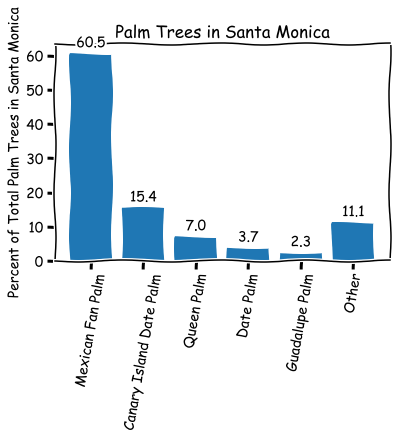

In [36]:
import matplotlib.pyplot as plt
plt.xkcd()
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
x = ax.bar(palmtreecounts_summary['Name Common'],palmtreecounts_summary['Percent'].round(decimals=1))
autolabel(x)
plt.title('Palm Trees in Santa Monica')
plt.ylabel('Percent of Total Palm Trees in Santa Monica')
plt.xticks(rotation=80)
plt.show()